<a href="https://colab.research.google.com/github/Airdef/Portfolio/blob/main/LLamaindex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install lib

In [ ]:
!pip install -q llama-index
!pip install openai
!pip install llama-cpp-python
!pip install transformers

#!pip install PyPDF2


Import lib

In [ ]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex, Settings #Load data and store embeddings
from llama_index.llms.openai import OpenAI #chatgpt as llm
from llama_index.embeddings.openai import OpenAIEmbedding #embedding generation
from llama_index.core.node_parser import SentenceSplitter #break text into sentences

import time #wait between inputs
import os
from IPython.display import clear_output #clear console
from getpass import getpass #secure password input
import openai #API KEY validation

#from PyPDF2 import PdfReader
#from IPython.display import Markdown, display #Display output

Create directory for pdfs if not exists

In [ ]:

dir="/content/KW_space" #dir path

if not os.path.exists(dir): #Check if path already exist
    try:
      !mkdir {dir} #create directory
      print(f"directory: {dir} created")
    except:
      print(f"Fatal Error")
      exit(0)
else:
    print(f"Directory {dir} exists.")


Click on the folder icon to show the directories (if not visible)

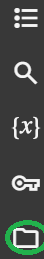

Refresh button:


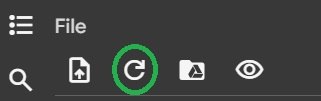

Sometimes the directory exists while not displayed, there is no command to execute the refresh automatically

In [ ]:
print("please refresh files index (second icon on the left)\n")
time.sleep(1)

print("Directory is empty\n")
print("please Load PDF into dir called: KW_space\n")
print("If you can not see the directory please refresh the index\n")

while not os.listdir("/content/KW_space"): #check if dir is empty, wait until a file is loaded
    time.sleep(2) #check every 2 sec

clear_output() #clean console
print("File Loaded\n")
time.sleep(10) #wait to be sure the file is correctly loaded

Import Openai key

In [ ]:
os.environ['OPENAI_API_KEY']="" #Init API KEY var

while  True:  #wait until a valid KEY is inserted
  os.environ['OPENAI_API_KEY']=getpass("Please write OPENAI API KEY: ") #get API KEY as input
  clear_output(wait=True) #clean console
  client = openai.OpenAI(api_key=os.environ['OPENAI_API_KEY'])
  try:
      client.models.list() #Test API KEY validity
      print( "API Key is valid!")
      break

  except :
      print( "Authentication failed: The API Key is invalid.")


print("Key saved")
time.sleep(5)

Read PDF from directory

In [ ]:
try:
  doc=SimpleDirectoryReader( input_dir=dir, required_exts=[".pdf"]).load_data() #load file for llamaindex use
  print("files imported correctly")
except:
  print("error file not imported, control files")


Setup model and chunks sizes



In [ ]:
Settings.llm = OpenAI(model="gpt-3.5-turbo")
Settings.embed_model = OpenAIEmbedding(model="text-embedding-3-small")
Settings.node_parser = SentenceSplitter(chunk_size=512, chunk_overlap=20)  #512 tokens per chunk, 20 tokens overlapping from the previous chunk
Settings.num_output = 512 # Number of tokens per output chunk
Settings.context_window = 3900 # Size of the context window in tokens

In [ ]:
index= VectorStoreIndex.from_documents(doc) # Create an index from a list of documents, converting each document into a vector and storing them for retrieval.
del doc #delete doc var
# index.storage_context.persist()    #in case you want to save embeddings into a folder

Query

In [ ]:
query_engine=index.as_query_engine() # create query engine to enable  search and retrieval operations on the document vectors.


Q/A

In [ ]:
count=0 #error counter
while True: # Continue execution until 5 errors occur or the user inputs '0' to exit.

  Q=input("what is you question based on the pdf? (0 to exit):\n ") #input your question
  if Q == "0":
    count=0
    break

  try:
    print("\n",query_engine.query(Q),"\n\n") #print response from llm
    if count >0:
      count=0 #reset error counter

  except:
    count+=1 #increment error counter
    print("Problem occurred, please try again")
    if count >=5:
      exit(0) #exit if 5 errors detected

